# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [23]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\acara\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [24]:
# Read your api key environment variable
load_dotenv('SL.env')
news_api_key = os.getenv("News_Api")
type(news_api_key)

NoneType

In [25]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key="84458bf3e4b14a57b3e7235ca3f7c898")

In [26]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(q="bitcoin", language="en")
btc_news["articles"][0]


{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'https://www.engadget.com/about/editors/saqib-shah',
 'title': 'El Salvador becomes the first country to approve Bitcoin as legal currency',
 'description': 'El Salvador has voted to adopt Bitcoin as legal tender..',
 'url': 'https://www.engadget.com/el-salvador-bitcoin-legal-tender-120440725.html',
 'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-06/84c12d30-c919-11eb-a6ff-cedcc0c31aae',
 'publishedAt': '2021-06-09T12:04:40Z',
 'content': "El Salvador's President Nayib Bukele has made good on his promise to adopt Bitcoin as legal tender. Officials in the Central American country's congress voted to accept the cryptocurrency by a majori… [+1414 chars]"}

In [27]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(q="ethereum", language="en")
eth_news["articles"][0]


{'source': {'id': 'mashable', 'name': 'Mashable'},
 'author': 'Joseph Green',
 'title': 'This blockchain development course bundle is on sale for 97% off',
 'description': 'TL;DR: The Cryptocurrency with Ethereum and Solidity Blockchain Developer Bundle is on sale for £21.25 as of June 17, saving you 97% on list price.\n\nIs everyone you know investing in cryptocurrency? The Cryptocurrency with Ethereum and Solidity Blockchain Dev…',
 'url': 'https://mashable.com/uk/shopping/june-17-cryptocurrency-ethereum-and-solidity-blockchain-developer-bundle/',
 'urlToImage': 'https://mondrian.mashable.com/2021%252F06%252F17%252Fa4%252Fd95c8d39ee014266beea8c6b9d053d19.1c765.jpg%252F1200x630.jpg?signature=13rMcdTv3FsupfDx5m8coAhsN-4=',
 'publishedAt': '2021-06-17T04:05:00Z',
 'content': 'TL;DR: The Cryptocurrency with Ethereum and Solidity Blockchain Developer Bundle is on sale for £21.25 as of June 17, saving you 97% on list price.\r\nIs everyone you know investing in cryptocurrency? … [+949 chars

In [28]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

bitcoin_df = pd.DataFrame(btc_sentiments)
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]
bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2021-06-09T12:04:40Z,El Salvador's President Nayib Bukele has made ...,0.8402,0.282,0.0,0.718
1,2021-06-09T10:00:00Z,El Salvador has become the first country in th...,0.1280,0.043,0.0,0.957
2,2021-06-14T07:15:49Z,"It's all about clean energy, it seems. \r\nElo...",0.6908,0.169,0.0,0.831
3,2021-06-09T08:27:58Z,image captionThe move means bitcoin will be ac...,0.2732,0.060,0.0,0.940
4,2021-06-11T00:45:00Z,"Several crypto fans that descended on Miami, F...",0.5574,0.107,0.0,0.893


In [29]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    

eth_df = pd.DataFrame(eth_sentiments)


cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2021-06-17,TL;DR: The Cryptocurrency with Ethereum and So...,0.000,0.0,0.000,1.000
1,2021-06-20,It wasn't long ago that your average person ha...,-0.296,0.0,0.061,0.939
2,2021-05-31,A representation of virtual currency Ethereum ...,0.000,0.0,0.000,1.000
3,2021-06-10,This article was translated from our Spanish e...,-0.340,0.0,0.066,0.934
4,2021-06-03,This new mining feature is called 'Norton Cryp...,0.000,0.0,0.000,1.000


In [30]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.00000
mean,0.179920,0.074800,0.026900,0.89825
std,0.383615,0.069831,0.039178,0.06832
min,-0.557400,0.000000,0.000000,0.71800
25%,0.000000,0.032250,0.000000,0.84475
50%,0.165150,0.065500,0.000000,0.91050
75%,0.401050,0.105500,0.059000,0.94375
max,0.840200,0.282000,0.107000,1.00000


In [31]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.065470,0.043750,0.021850,0.934350
std,0.325641,0.060552,0.042284,0.071399
min,-0.458800,0.000000,0.000000,0.782000
25%,-0.019300,0.000000,0.000000,0.915750
50%,0.000000,0.000000,0.000000,0.937000
75%,0.242025,0.070000,0.015250,1.000000
max,0.778300,0.191000,0.151000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: BTC had the higher mean positive score

Q: Which coin had the highest compound score?

A: BTC wins this one again

Q. Which coin had the highest positive score?

A: BTC

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [32]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [33]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [34]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    clean_text = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(clean_text)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    lower_case = [word.lower() for word in lem]
    
    # Remove the stop words
    tokens = [word for word in lower_case if word not in sw]
    
    return tokens

In [35]:
# Create a new tokens column for Bitcoin
tokenized_btc_articles = [tokenizer(article['content']) for article in btc_news['articles']]
bitcoin_df['tokens'] = tokenized_btc_articles
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-06-09T12:04:40Z,El Salvador's President Nayib Bukele has made ...,0.8402,0.282,0.0,0.718,"[el, salvadors, president, nayib, bukele, ha, ..."
1,2021-06-09T10:00:00Z,El Salvador has become the first country in th...,0.1280,0.043,0.0,0.957,"[el, salvador, ha, become, first, country, wor..."
2,2021-06-14T07:15:49Z,"It's all about clean energy, it seems. \r\nElo...",0.6908,0.169,0.0,0.831,"[clean, energy, seemselon, musk, tesla, caused..."
3,2021-06-09T08:27:58Z,image captionThe move means bitcoin will be ac...,0.2732,0.060,0.0,0.940,"[image, captionthe, move, mean, bitcoin, accep..."
4,2021-06-11T00:45:00Z,"Several crypto fans that descended on Miami, F...",0.5574,0.107,0.0,0.893,"[several, crypto, fan, descended, miami, flori..."


In [37]:
# Create a new tokens column for Ethereum
tokenized_eth_articles = [tokenizer(article['content']) for article in eth_news['articles']]
eth_df['tokens'] = tokenized_eth_articles
eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-06-17,TL;DR: The Cryptocurrency with Ethereum and So...,0.000,0.0,0.000,1.000,"[tldr, cryptocurrency, ethereum, solidity, blo..."
1,2021-06-20,It wasn't long ago that your average person ha...,-0.296,0.0,0.061,0.939,"[wasnt, long, ago, average, person, clue, nft,..."
2,2021-05-31,A representation of virtual currency Ethereum ...,0.000,0.0,0.000,1.000,"[representation, virtual, currency, ethereum, ..."
3,2021-06-10,This article was translated from our Spanish e...,-0.340,0.0,0.066,0.934,"[article, wa, translated, spanish, edition, us..."
4,2021-06-03,This new mining feature is called 'Norton Cryp...,0.000,0.0,0.000,1.000,"[new, mining, feature, called, norton, crypto,..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [38]:
from collections import Counter
from nltk import ngrams

In [41]:
# Generate the Bitcoin N-grams where N=2
bitcoin_text = ' '.join(bitcoin_df.text)
bitcoin_processed = tokenizer(bitcoin_text)
bitcoin_ngrams = Counter(ngrams(bitcoin_processed, n=2))
print(dict(bitcoin_ngrams.most_common(10)))

{('bitcoin', 'legal'): 6, ('legal', 'tender'): 5, ('el', 'salvador'): 5, ('reuters', 'el'): 4, ('central', 'american'): 3, ('june', 'reuters'): 3, ('president', 'nayib'): 2, ('nayib', 'bukele'): 2, ('salvador', 'ha'): 2, ('ha', 'become'): 2}


In [42]:
# Generate the Ethereum N-grams where N=2
ethereum_text = ' '.join(eth_df.text)
ethereum_processed = tokenizer(ethereum_text)
ethereum_ngrams = Counter(ngrams(ethereum_processed, n=2))
print(dict(ethereum_ngrams.most_common(10)))

{('digital', 'yuan'): 3, ('norton', 'crypto'): 2, ('nonfungible', 'token'): 2, ('qian', 'former'): 2, ('former', 'head'): 2, ('head', 'chinas'): 2, ('chinas', 'digital'): 2, ('tldr', 'cryptocurrency'): 1, ('cryptocurrency', 'ethereum'): 1, ('ethereum', 'solidity'): 1}


In [43]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [44]:
# Use token_count to get the top 10 words for Bitcoin
bitcoin_top10 = token_count(bitcoin_processed)
bitcoin_top10

[('char', 20), ('bitcoin', 15), ('salvador', 8)]

In [45]:
# Use token_count to get the top 10 words for Ethereum
ethereum_top10 = token_count(ethereum_processed)
ethereum_top10

[('char', 19), ('cryptocurrency', 7), ('ethereum', 6)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

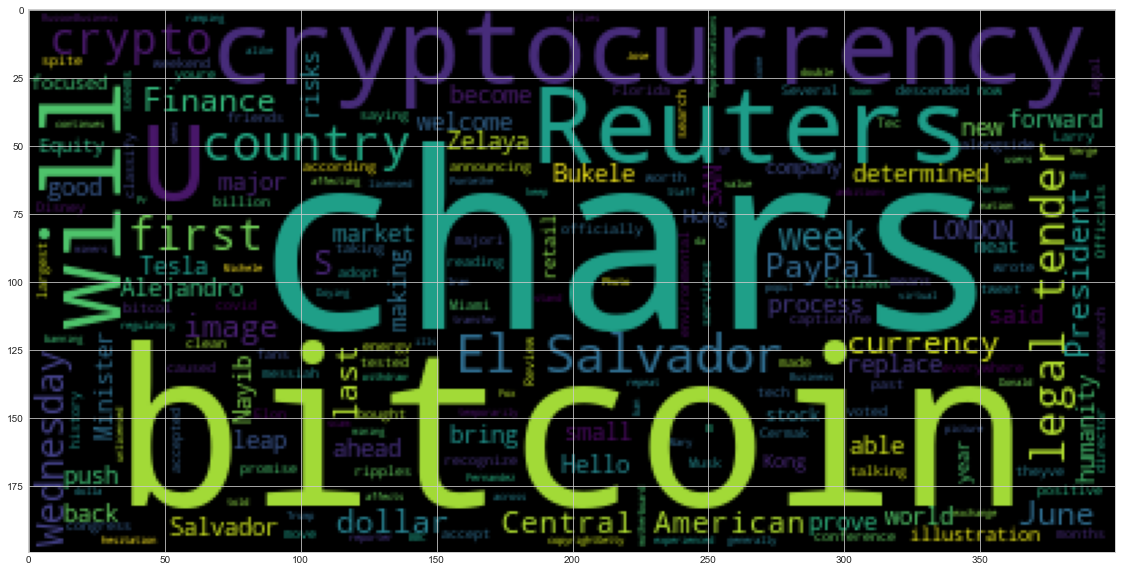

In [47]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(bitcoin_text)
plt.imshow(wc)

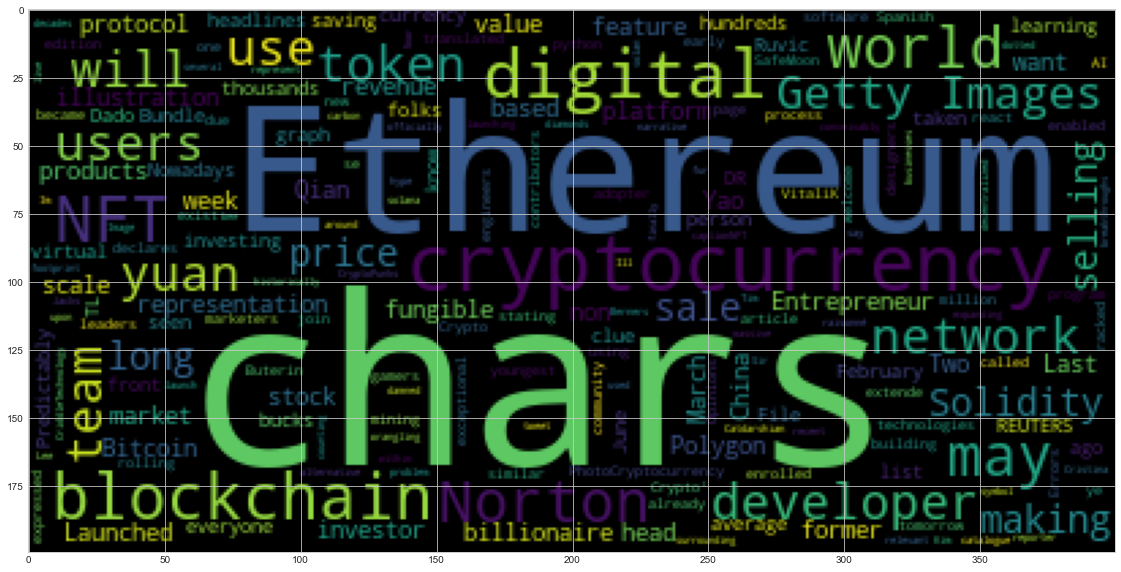

In [48]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(ethereum_text)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [49]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [50]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [51]:
# Concatenate all of the Bitcoin text together
bitcoin_text = ' '.join(bitcoin_df.text)
bitcoin_text

'El Salvador\'s President Nayib Bukele has made good on his promise to adopt Bitcoin as legal tender. Officials in the Central American country\'s congress voted to accept the cryptocurrency by a majori… [+1414 chars] El Salvador has become the first country in the world to recognize the cryptocurrency bitcoin as legal currency, according to President Nayib Bukele in a tweet on Wednesday. Citizens will be able to … [+3840 chars] It\'s all about clean energy, it seems.\xa0\r\nElon Musk and Tesla caused ripples in the cryptocurrency market in the past few months, first by announcing that Tesla had bought $1.5 billion worth of bitcoi… [+2508 chars] image captionThe move means bitcoin will be accepted everywhere for goods and services, alongside the US dollar\r\nEl Salvador has become the first country in the world to officially classify Bitcoin a… [+2233 chars] Several crypto fans that descended on Miami, Florida, last weekend for the largest bitcoin conference in history are now saying t

In [57]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_text)

# Add a title to the document
bitcoin_doc.user_data["title"] = "Bitcoin: The New El Salvador Dollar?!"

In [58]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

In [59]:
# List all Entities
for ent in bitcoin_doc.ents:
    print(ent.text + ' ' + ent.label_)

El Salvador's GPE
Nayib Bukele PERSON
Central American NORP
El Salvador GPE
first ORDINAL
Nayib Bukele PERSON
Wednesday DATE
Citizens ORG
Elon Musk PERSON
Tesla PERSON
the past few months DATE
first ORDINAL
Tesla ORG
$1.5 billion MONEY
US GPE
El Salvador GPE
first ORDINAL
Bitcoin PERSON
Miami GPE
Florida GPE
last weekend DATE
covid-19 PERSON
Larry Cermak PERSON
Last week DATE
Disney ORG
This week DATE
Tec PERSON
PayPals ORG
Wednesday DATE
Jose Fernandez da Pontethe PERSON
Mary-Ann RussonBusiness PERSON
BBC News ORG
US GPE
Donald Trump PERSON
Fox Business ORG
Bitcoin PERSON
US GPE
Photo PERSON
Michele Doying PERSON
Verge ORG
Iran GPE
years DATE
PayPal PERSON
Soon PERSON
PayPal PERSON
U.S. GPE
Bitcoin PERSON
June 16 DATE
Reuters ORG
El Salvador GPE
U.S. GPE
Finance ORG
Alejandro Zelaya PERSON
Wednesday DATE
Central American NORP
LONDON GPE
June 23 DATE
Reuters ORG
El Salvador GPE
Pr PERSON
LONDON GPE
June 23 DATE
Reuters ORG
El Salvador GPE
Reuters ORG
Reuters ORG
El Salvador GPE
U.S. GP

---

### Ethereum NER

In [60]:
# Concatenate all of the Ethereum text together
ethereum_text = ' '.join(eth_df.text)
ethereum_text

'TL;DR: The Cryptocurrency with Ethereum and Solidity Blockchain Developer Bundle is on sale for £21.25 as of June 17, saving you 97% on list price.\r\nIs everyone you know investing in cryptocurrency? … [+949 chars] It wasn\'t long ago that your average person had no clue what an NFT was. Nowadays, they\'re making headlines for selling for hundreds of thousands of bucks. Predictably, folks are learning about NFTs … [+3056 chars] A representation of virtual currency Ethereum is seen in front of a stock graph in this illustration taken February 19, 2021. REUTERS/Dado Ruvic/Illustration/File PhotoCryptocurrency Ethereum extende… [+1099 chars] This article was translated from our Spanish edition using AI technologies. Errors may exist due to this process.\r\nLast May, VitaliK Buterin became the youngest billionaire in the world at just 27 ye… [+2422 chars] This new mining feature is called \'Norton Crypto\' and will be rolling out tomorrow to Norton 360 users enrolled in Norton\'s early a

In [56]:
# Run the NER processor on all of the text
ethereum_doc = nlp(ethereum_text)
# Add a title to the document
ethereum_doc.user_data["title"] = "Ethereum: Is it all Hype or a Bitcoin Killer?!"

In [61]:
# Render the visualization
displacy.render(ethereum_doc, style='ent')

In [62]:
# List all Entities
for ent in ethereum_doc.ents:
    print(ent.text + ' ' + ent.label_)

21.25 MONEY
June 17 DATE
97% PERCENT
NFT ORG
hundreds of thousands CARDINAL
Ethereum ORG
February 19, 2021 DATE
Spanish NORP
AI ORG
Last May DATE
Buterin PERSON
27 CARDINAL
tomorrow DATE
Norton ORG
Norton ORG
Norton Crypto PERSON
Entrepreneur ORG
March 2021 DATE
more than one million CARDINAL
SafeMoon ORG
decades DATE
Ill PERSON
Jacks ORG
CriddleTechnology ORG
Kim Catdarshian PERSON
Ethereum ORG
March 2020 DATE
Tim Berners-Lee PERSON
NFT ORG
Sotheby's ORG
NFT ORG
Steven Ferdman PERSON
Mark Cuban PERSON
Ethereum ORG
Polygon ORG
Polygon ORG
tEhereum ORG
Two CARDINAL
Keep Network ORG
Last week DATE
Indonesia GPE
first ORDINAL
today DATE
Qian PERSON
China GPE
Sina Finance ORG
Monday DATE
Photo PERSON
S3studio/ ORG
Getty Images ORG
May DATE
$1.93 billion MONEY
Entrepreneur PERSON
Costfoto PERSON
Barcroft Media PERSON
Getty Images ORG
Yao Qian PERSON
China GPE
two weeks DATE
Bitcoin PERSON
13 per cent MONEY
second ORDINAL
Eth ORG


---